# CASSAVA LEAF DISEASE CLASSIFICATION

As the second-largest provider of carbohydrates in Africa, cassava is a key food security crop grown by smallholder farmers because it can withstand harsh conditions. At least 80% of household farms in Sub-Saharan Africa grow this starchy root, but viral diseases are major sources of poor yields. With the help of data science, it may be possible to identify common diseases so they can be treated.

source: https://www.kaggle.com/c/cassava-leaf-disease-classification/overview

## Data Preparation

### stream data using API
Before we can import data from Kaggle to google.colab, we need to download the API token by Login to Kaggle > My Account > Home > Create New API Token. The API token wil be downloaded in the format of kaggle.json, then we need to upload it to goole colab hosted runtime.

In [1]:
# upload your 'kaggle.json' to hosted runtime
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samuelpolontalo","key":"823c8a6c6a0318cba4c48dcbbdc294ea"}'}

we need to do several adjustment such as installing kaggle library using pip and so on, until we adjust the access permisions

In [2]:
# Install kaggle library 
!pip install -q kaggle
# Make ".kaggle" directory in root directory
!mkdir -p ~/.kaggle
# Copy the API token to the kaggle directory
!cp kaggle.json ~/.kaggle/
# Check the directory
!ls ~/.kaggle
# Adjust access permissions
!chmod 600 /root/.kaggle/kaggle.json

# WTF reinstall kaggle
!pip uninstall -y kaggle
!pip install kaggle

kaggle.json
Uninstalling kaggle-1.5.9:
  Successfully uninstalled kaggle-1.5.9
     |████████████████████████████████| 61kB 6.3MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.9-cp36-none-any.whl size=73265 sha256=57f8307925ac9d33780a846eab584105f8f339b7b0fa4d4bf68043ddbdea3414
  Stored in directory: /root/.cache/pip/wheels/68/6d/9b/7a98271454edcba3b56328cbc78c037286e787d004c8afee71
Successfully built kaggle


The cell bellow contains the command to download the data into your hosted directory (google server). Basicly you just migrated the whole dataset from kaggle's server into google's server.

**Specificly For competition** open your kaggle.json and change kaggle user name and key accordingly

In [3]:
import os

# authentication 
# os.environ["KAGGLE_USERNAME"] = 'reizkianyesaya'
# os.environ["KAGGLE_KEY"] = '92844990e0f3c2306230314f99e0e015'
os.environ["KAGGLE_USERNAME"] = 'samuelpolontalo'
os.environ["KAGGLE_KEY"] = '823c8a6c6a0318cba4c48dcbbdc294ea'

# migrate data from kaggle to google
!mkdir downloaded-data
!kaggle competitions download -c cassava-leaf-disease-classification -p downloaded-data

100% 5.75G/5.76G [01:43<00:00, 58.0MB/s]
100% 5.76G/5.76G [01:43<00:00, 59.7MB/s]


In [4]:
# check the folders inside your directory
!ls
# check what is inside data folder
!ls downloaded-data

downloaded-data  kaggle.json  sample_data
cassava-leaf-disease-classification.zip


In [5]:
# unzip the data
!apt-get install -y fuse-zip
!mkdir {"extracted-data"}
!fuse-zip downloaded-data/cassava-leaf-disease-classification.zip extracted-data

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libzip4
The following NEW packages will be installed:
  fuse-zip libzip4
0 upgraded, 2 newly installed, 0 to remove and 14 not upgraded.
Need to get 65.6 kB of archives.
After this operation, 178 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libzip4 amd64 1.1.2-1.1 [37.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fuse-zip amd64 0.4.4-1 [27.9 kB]
Fetched 65.6 kB in 0s (1,169 kB/s)
Selecting previously unselected package libzip4:amd64.
(Reading database ... 144793 files and directories currently installed.)
Preparing to unpack .../libzip4_1.1.2-1.1_amd64.deb ...
Unpacking libzip4:amd64 (1.1.2-1.1) ...
Selecting previously unselected package fuse-zip.
Preparing to unpack .../fuse-zip_0.4.4-1_amd64.deb ...
Unpacking fuse-zip (0.4.4-1) ...
Setting up libzip4:amd64 

In [6]:
!ls extracted-data

label_num_to_disease_map.json  test_images     train.csv     train_tfrecords
sample_submission.csv	       test_tfrecords  train_images


data has been extracted in the folder "extracted-data"

In [7]:
os.listdir("extracted-data")

['label_num_to_disease_map.json',
 'sample_submission.csv',
 'test_images',
 'test_tfrecords',
 'train.csv',
 'train_images',
 'train_tfrecords']

### data cleaning
The train data inside 'extracted-data/train_images' are scattered. They are not organized in specific folders for each different classes. Although, the label for each specific images can be obtained by refering to the table in **'extracted-data/train.csv'**. **To do:** we need to separate each images according to their class

In [8]:
# reading the train.csv as reference label
import pandas as pd
import json

BASE_DIR = "extracted-data"

# read disease classes name in json file
with open(os.path.join(BASE_DIR, "label_num_to_disease_map.json")) as file:
    map_classes = json.loads(file.read())
print(json.dumps(map_classes, indent=4))

# implement classesname in train_csv
train_csv = pd.read_csv(os.path.join(BASE_DIR, "train.csv"))
train_csv["class_name"] = train_csv["label"].astype(str).map(map_classes)

{
    "0": "Cassava Bacterial Blight (CBB)",
    "1": "Cassava Brown Streak Disease (CBSD)",
    "2": "Cassava Green Mottle (CGM)",
    "3": "Cassava Mosaic Disease (CMD)",
    "4": "Healthy"
}


In [9]:
train_csv

,image_id,label,class_name
0,1000015157.jpg,0,Cassava Bacterial Blight (CBB)
1,1000201771.jpg,3,Cassava Mosaic Disease (CMD)
2,100042118.jpg,1,Cassava Brown Streak Disease (CBSD)
3,1000723321.jpg,1,Cassava Brown Streak Disease (CBSD)
4,1000812911.jpg,3,Cassava Mosaic Disease (CMD)
...,...,...,...
21392,999068805.jpg,3,Cassava Mosaic Disease (CMD)
21393,999329392.jpg,3,Cassava Mosaic Disease (CMD)
21394,999474432.jpg,1,Cassava Brown Streak Disease (CBSD)
21395,999616605.jpg,4,Healthy


In [10]:
# extract image_id and label_id to list
image_id = train_csv["image_id"].tolist()
label_id = train_csv["label"].tolist()

In [11]:
# Create directory for specific class
# allert! run this code once (bellow are LINUX command line to run on google server)
!mkdir extracted-data/train_images/CBB
!mkdir extracted-data/train_images/CBSD
!mkdir extracted-data/train_images/CGM
!mkdir extracted-data/train_images/CMD
!mkdir extracted-data/train_images/Healthy

In [12]:
# check if the folders were created in 'extracted-data/train_images' directory
!ls extracted-data/train_images

1000015157.jpg	1764927533.jpg	2519456872.jpg	3299964343.jpg	4083175669.jpg
1000201771.jpg	1764971103.jpg	2519536403.jpg	3300292911.jpg	4083517071.jpg
100042118.jpg	1765114818.jpg	2519700384.jpg	3300470808.jpg	408355226.jpg
1000723321.jpg	1765190680.jpg	2520465654.jpg	3300523135.jpg	4083589127.jpg
1000812911.jpg	176531736.jpg	2520536047.jpg	3300885184.jpg	4083644073.jpg
1000837476.jpg	1765348139.jpg	2520567878.jpg	3300973155.jpg	4083711449.jpg
1000910826.jpg	1765374655.jpg	2520575801.jpg	330151252.jpg	4083726805.jpg
1001320321.jpg	1765947311.jpg	2520781924.jpg	3301514895.jpg	4083737751.jpg
1001723730.jpg	1766436653.jpg	2520798009.jpg	3301703643.jpg	4083768019.jpg
1001742395.jpg	1766917625.jpg	2520828282.jpg	3301808128.jpg	4083830732.jpg
1001749118.jpg	1766960814.jpg	2520831403.jpg	3301885243.jpg	4083849263.jpg
100204014.jpg	176734204.jpg	2521365018.jpg	3302033830.jpg	4084071481.jpg
1002088496.jpg	1767778795.jpg	2521418198.jpg	3302044032.jpg	408414905.jpg
1002255315.jpg	1768003077.jpg	25

In [13]:
# Iterate to move the unorganized images in train_images directory to specific class folders
import shutil

# create folders for specific classes
TRAIN_DIR = os.path.join(BASE_DIR,"train_images")
TRAIN_DIR_CBB = os.path.join(TRAIN_DIR,"CBB")
TRAIN_DIR_CBSD = os.path.join(TRAIN_DIR,"CBSD")
TRAIN_DIR_CGM = os.path.join(TRAIN_DIR,"CGM")
TRAIN_DIR_CMD = os.path.join(TRAIN_DIR,"CMD")
TRAIN_DIR_Healthy = os.path.join(TRAIN_DIR,"Healthy")

# move the images file to specific folder by IF CONDITION
for ImageFileName,ImageLabel in zip(image_id,label_id):
  if ImageLabel == 0:
    shutil.move(os.path.join(TRAIN_DIR,ImageFileName), os.path.join(TRAIN_DIR_CBB,ImageFileName))
  if ImageLabel == 1:
    shutil.move(os.path.join(TRAIN_DIR,ImageFileName), os.path.join(TRAIN_DIR_CBSD,ImageFileName))
  if ImageLabel == 2:
    shutil.move(os.path.join(TRAIN_DIR,ImageFileName), os.path.join(TRAIN_DIR_CGM,ImageFileName))
  if ImageLabel == 3:
    shutil.move(os.path.join(TRAIN_DIR,ImageFileName), os.path.join(TRAIN_DIR_CMD,ImageFileName))
  if ImageLabel == 4:
    shutil.move(os.path.join(TRAIN_DIR,ImageFileName), os.path.join(TRAIN_DIR_Healthy,ImageFileName))

In [14]:
# check if the 'extracted-data/train_images' only contain CLASSES FOLDER
!ls extracted-data/train_images

CBB  CBSD  CGM	CMD  Healthy


after separate each images according to their class, the next step is to separate data training and data validation randomly using the scikit-learn

In [15]:
TRAIN_CBB = os.path.join(TRAIN_DIR_CBB,"train")
VAL_CBB = os.path.join(TRAIN_DIR_CBB,"val")
TRAIN_CBSD = os.path.join(TRAIN_DIR_CBSD,"train")
VAL_CBSD = os.path.join(TRAIN_DIR_CBSD,"val")
TRAIN_CGM = os.path.join(TRAIN_DIR_CGM,"train")
VAL_CGM = os.path.join(TRAIN_DIR_CGM,"val")
TRAIN_CMD = os.path.join(TRAIN_DIR_CMD,"train")
VAL_CMD = os.path.join(TRAIN_DIR_CMD,"val")
TRAIN_Healthy = os.path.join(TRAIN_DIR_Healthy,"train")
VAL_Healthy = os.path.join(TRAIN_DIR_Healthy,"val")

In [16]:
# import numpy as np

# a = os.listdir(TRAIN_DIR_CMD)
# subset = np.random.choice(a, int(len(a)*0.16), replace=False)
# len(subset) # change the 'os.listdir(TRAIN_DIR_CMD)' with subset to fix cmd volume

In [16]:
from sklearn.model_selection import train_test_split

train_data_CBB, val_data_CBB = train_test_split(os.listdir(TRAIN_DIR_CBB), train_size = 0.8)
train_data_CBSD, val_data_CBSD = train_test_split(os.listdir(TRAIN_DIR_CBSD), train_size = 0.8)
train_data_CGM, val_data_CGM = train_test_split(os.listdir(TRAIN_DIR_CGM), train_size = 0.8)
train_data_CMD, val_data_CMD = train_test_split(os.listdir(TRAIN_DIR_CMD), train_size = 0.8) #change here
train_data_Healthy, val_data_Healthy = train_test_split(os.listdir(TRAIN_DIR_Healthy), train_size = 0.8)

In [17]:
if not os.path.exists(TRAIN_CBB):
  os.mkdir(TRAIN_CBB)
if not os.path.exists(VAL_CBB):
  os.mkdir(VAL_CBB)

if not os.path.exists(TRAIN_CBSD):
  os.mkdir(TRAIN_CBSD)
if not os.path.exists(VAL_CBSD):
  os.mkdir(VAL_CBSD)

if not os.path.exists(TRAIN_CGM):
  os.mkdir(TRAIN_CGM)
if not os.path.exists(VAL_CGM):
  os.mkdir(VAL_CGM)

if not os.path.exists(TRAIN_CMD):
  os.mkdir(TRAIN_CMD)
if not os.path.exists(VAL_CMD):
  os.mkdir(VAL_CMD)

if not os.path.exists(TRAIN_Healthy):
  os.mkdir(TRAIN_Healthy)
if not os.path.exists(VAL_Healthy):
  os.mkdir(VAL_Healthy)

In [18]:
for i in train_data_CBB:
  shutil.move(os.path.join(TRAIN_DIR_CBB, i), os.path.join(TRAIN_CBB, i))
for i in val_data_CBB:
  shutil.move(os.path.join(TRAIN_DIR_CBB, i), os.path.join(VAL_CBB, i))

for i in train_data_CBSD:
  shutil.move(os.path.join(TRAIN_DIR_CBSD, i), os.path.join(TRAIN_CBSD, i))
for i in val_data_CBSD:
  shutil.move(os.path.join(TRAIN_DIR_CBSD, i), os.path.join(VAL_CBSD, i))

for i in train_data_CGM:
  shutil.move(os.path.join(TRAIN_DIR_CGM, i), os.path.join(TRAIN_CGM, i))
for i in val_data_CGM:
  shutil.move(os.path.join(TRAIN_DIR_CGM, i), os.path.join(VAL_CGM, i))

for i in train_data_CMD:
  shutil.move(os.path.join(TRAIN_DIR_CMD, i), os.path.join(TRAIN_CMD, i))
for i in val_data_CMD:
  shutil.move(os.path.join(TRAIN_DIR_CMD, i), os.path.join(VAL_CMD, i))

for i in train_data_Healthy:
  shutil.move(os.path.join(TRAIN_DIR_Healthy, i), os.path.join(TRAIN_Healthy, i))
for i in val_data_Healthy:
  shutil.move(os.path.join(TRAIN_DIR_Healthy, i), os.path.join(VAL_Healthy, i))

In [19]:
!mkdir data_train
!mkdir data_val

Combine training data and validation data in the same directory for the modeling preparation

In [20]:
#copy data cbb to new directory
train_cbb_copy = '/content/extracted-data/train_images/CBB/train'
train_cbb_paste = '/content/data_train/cbb'
val_cbb_copy = '/content/extracted-data/train_images/CBB/val'
val_cbb_paste = '/content/data_val/cbb'

In [21]:
shutil.copytree(train_cbb_copy,train_cbb_paste, copy_function= shutil.copy)
shutil.copytree(val_cbb_copy,val_cbb_paste, copy_function= shutil.copy)

'/content/data_val/cbb'

In [22]:
#copy data cbsd to new directory
train_cbsd_copy = '/content/extracted-data/train_images/CBSD/train'
train_cbsd_paste = '/content/data_train/cbsd'
val_cbsd_copy = '/content/extracted-data/train_images/CBSD/val'
val_cbsd_paste = '/content/data_val/cbsd'

In [23]:
#copying directory using shutil
shutil.copytree(train_cbsd_copy,train_cbsd_paste, copy_function= shutil.copy)
shutil.copytree(val_cbsd_copy,val_cbsd_paste, copy_function= shutil.copy)

'/content/data_val/cbsd'

In [24]:
train_cgm_copy = '/content/extracted-data/train_images/CGM/train'
train_cgm_paste = '/content/data_train/cgm'
val_cgm_copy = '/content/extracted-data/train_images/CGM/val'
val_cgm_paste = '/content/data_val/cgm'

In [25]:
#copying directory using shutil
shutil.copytree(train_cgm_copy,train_cgm_paste, copy_function= shutil.copy)
shutil.copytree(val_cgm_copy,val_cgm_paste, copy_function= shutil.copy)

'/content/data_val/cgm'

In [26]:
train_cmd_copy = '/content/extracted-data/train_images/CMD/train'
train_cmd_paste = '/content/data_train/cmd'
val_cmd_copy = '/content/extracted-data/train_images/CMD/val'
val_cmd_paste = '/content/data_val/cmd'

In [27]:
#copying directory using shutil
shutil.copytree(train_cmd_copy,train_cmd_paste, copy_function= shutil.copy)
shutil.copytree(val_cmd_copy,val_cmd_paste, copy_function= shutil.copy)

'/content/data_val/cmd'

In [28]:
train_healthy_copy = '/content/extracted-data/train_images/Healthy/train'
train_healthy_paste = '/content/data_train/healthy'
val_healthy_copy = '/content/extracted-data/train_images/Healthy/val'
val_healthy_paste = '/content/data_val/healthy'

In [29]:
#copying directory using shutil
shutil.copytree(train_healthy_copy,train_healthy_paste, copy_function= shutil.copy)
shutil.copytree(val_healthy_copy,val_healthy_paste, copy_function= shutil.copy)

'/content/data_val/healthy'

In [30]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [32]:
train_generator = train_datagen.flow_from_directory(
    '/content/data_train',
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/data_val',
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 17115 images belonging to 5 classes.
Found 4282 images belonging to 5 classes.


In [33]:
# membuat model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(5,5), activation= 'relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(5, activation= 'softmax')
])

In [34]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [35]:
from datetime import datetime
start_time = datetime.now()


history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/20
25/25 - 65s - loss: 2.0664 - accuracy: 0.3113 - val_loss: 4.5721 - val_accuracy: 0.1500
Epoch 2/20
25/25 - 64s - loss: 1.5784 - accuracy: 0.4162 - val_loss: 5.5829 - val_accuracy: 0.1063
Epoch 3/20
25/25 - 64s - loss: 1.3421 - accuracy: 0.5250 - val_loss: 7.3630 - val_accuracy: 0.0875
Epoch 4/20
25/25 - 64s - loss: 1.3386 - accuracy: 0.5375 - val_loss: 3.3040 - val_accuracy: 0.1125
Epoch 5/20
25/25 - 64s - loss: 1.3143 - accuracy: 0.5612 - val_loss: 1.6426 - val_accuracy: 0.1625
Epoch 6/20
25/25 - 65s - loss: 1.2101 - accuracy: 0.6175 - val_loss: 1.6512 - val_accuracy: 0.6313
Epoch 7/20
25/25 - 64s - loss: 1.2381 - accuracy: 0.6037 - val_loss: 1.2930 - val_accuracy: 0.6500
Epoch 8/20
25/25 - 64s - loss: 1.1685 - accuracy: 0.6162 - val_loss: 1.3528 - val_accuracy: 0.6000
Epoch 9/20
25/25 - 64s - loss: 1.1870 - accuracy: 0.5900 - val_loss: 1.7027 - val_accuracy: 0.1125
Epoch 10/20
25/25 - 64s - loss: 1.2148 - accuracy: 0.5938 - val_loss: 2.1820 - val_accuracy: 0.0875
Epoch 11/

Text(0.5, 1.0, 'Training and Validation Accuracy')

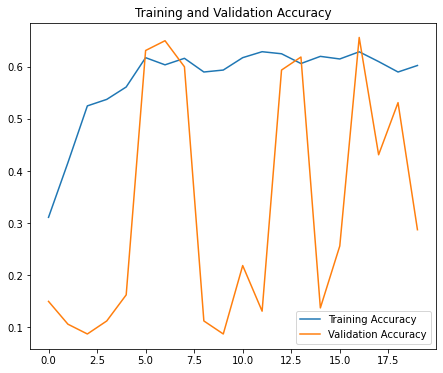

In [36]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

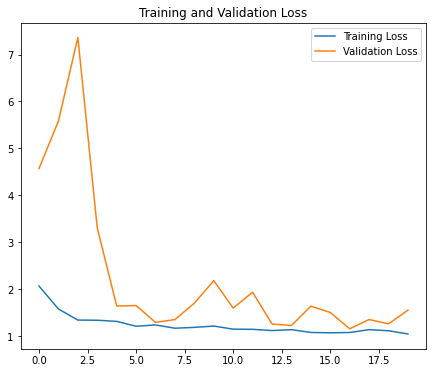

In [37]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
df_sub = pd.read_csv('/content/extracted-data/sample_submission.csv', index_col=0)
df_sub

,label
image_id,
2216849948.jpg,4


In [39]:
os.listdir(os.path.join(BASE_DIR, "test_images"))

['2216849948.jpg']

In [40]:
test_generator = test_datagen.flow_from_directory(
    '/content/extracted-data/test_images',
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 0 images belonging to 0 classes.


In [41]:
img_width, img_height = 28, 28
batch_size=32
prediction = train_datagen.flow_from_directory(
    '/content/extracted-data/test_images',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 0 images belonging to 0 classes.


In [1]:
output = pd.DataFrame({'label': prediction})
# output.to_csv('submission.csv', index=False)
# !kaggle competitions submit -c humpback-whale-identification -f submission.csv -m "Message"

NameError: ignored